### To predict whether the Breast Cancer is benign or malignant, a Machine Learning Model is built Using the Breast Cancer Wisconson Data Set

To do this, there should be followed below steps:

1. Define and Understand the Problem Statement
2. Data Gathering or Data Collection
3. Data Cleaning 
4. EDA like Feature Scaling, Feature Selection
5. Data Modeling
6. Model Evaluation
7. Model Deployment

### 1. Define and Understand the Problem Statement

The main objective is to identify the right features that are helpful in predicting malignant or benign cancer and to classify whether the breast cancer is benign or malignant.    

### 2. Data Gathering or Data Collection

I have taken the publicly available dataset of Breast Cancer Wisconsin and have downloaded from UCI Machine Learning Repository. Here is the link:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

#### Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

In [3]:
# config option that prints all interactive o/p without resorting to print not only the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [6]:
# load the dataset
breast_cancer = pd.read_csv("Breast_Cancer_Prediction.csv")

### Basic Dataframe Operations

Skimming through the data to get to know it better

In [7]:
# check the data quickly
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
# print the dimensions of breast_cancer data

print(f"Breast Cancer Dataset Dimensions are: ", breast_cancer.shape)

Breast Cancer Dataset Dimensions are:  (569, 33)


### 4. Exploratory Data Analysis

#### Dataset Summarization Methods

In [9]:
# Get the column data types and missing values
# breast_cancer.isnull.sum()
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
# check the statistical data from dataframe

breast_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [11]:
# check for unique values in the columns
features = breast_cancer.columns

for i in features:
    print("{} is unique: {}".format(i, breast_cancer[i].is_unique))

id is unique: True
diagnosis is unique: False
radius_mean is unique: False
texture_mean is unique: False
perimeter_mean is unique: False
area_mean is unique: False
smoothness_mean is unique: False
compactness_mean is unique: False
concavity_mean is unique: False
concave points_mean is unique: False
symmetry_mean is unique: False
fractal_dimension_mean is unique: False
radius_se is unique: False
texture_se is unique: False
perimeter_se is unique: False
area_se is unique: False
smoothness_se is unique: False
compactness_se is unique: False
concavity_se is unique: False
concave points_se is unique: False
symmetry_se is unique: False
fractal_dimension_se is unique: False
radius_worst is unique: False
texture_worst is unique: False
perimeter_worst is unique: False
area_worst is unique: False
smoothness_worst is unique: False
compactness_worst is unique: False
concavity_worst is unique: False
concave points_worst is unique: False
symmetry_worst is unique: False
fractal_dimension_worst is uni

#### Data Cleaning

In [12]:
# check the features
features = breast_cancer.columns
print(features)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


From the above,

1. I noticed that, two features are not necessary that is ID and Unnamed: 32 because it has all NaN values.


In [13]:
# drop the above two features
label = breast_cancer.diagnosis
lst = ["id", "Unnamed: 32", "diagnosis"]
updated_data = breast_cancer.drop(lst, axis=1)

In [14]:
updated_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Preprocessing

#### Feature Scaling:

It is technique used to standardize or normalize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.  If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

To do this, we have two most important techniques called "Standardization" and "Min-Max Normalization". We can apply both the techniques and compare the performance of best results for our ML model.

But befor we apply feature scaling to the data, we need to know about the variance, mean, std dev and max to understand what is going in the data. For this, we check the statistics of our data using describe() function.

In [15]:
updated_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


From the above data, if we observe the range of values in the features like area_mean, area_se & area_worst have huge difference if we compare to smoothness_mean etc.. likewise the other features like radius_mean, texture_mean and perimeter_mean have little more difference compare to other features that is ranging from 0 to 1.

Now, we apply feature scaling techniques.

#### Data Standardization:

The formula is, 

    Z = x - μ / σ
    
    Z - Standard Score
    x - Observation
    μ - mean
    σ - Standard deviation

In [16]:
# Given observed data as updated_data
obs_data = updated_data

# use the formula to standardize the data
data_std = (obs_data - obs_data.mean()) / (obs_data.std())
data_std.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.142575e-15,-6.558316e-15,-7.012551e-16,-8.339355e-16,6.083788e-15,-1.081346e-15,-3.703345e-16,9.935423e-16,-1.888550e-15,-1.424363e-15,...,-2.346102e-15,1.761138e-15,-1.214416e-15,5.919889e-16,-5.036783e-15,-2.118204e-15,6.899382e-16,-1.732650e-16,-2.454417e-15,2.438979e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.027864e+00,-2.227289e+00,-1.982759e+00,-1.453164e+00,-3.109349e+00,-1.608721e+00,-1.113893e+00,-1.260710e+00,-2.741705e+00,-1.818265e+00,...,-1.725382e+00,-2.222039e+00,-1.691872e+00,-1.221348e+00,-2.680337e+00,-1.442609e+00,-1.304683e+00,-1.743529e+00,-2.159060e+00,-1.600431e+00
25%,-6.887793e-01,-7.253249e-01,-6.913472e-01,-6.666089e-01,-7.103378e-01,-7.464292e-01,-7.430941e-01,-7.372951e-01,-7.026215e-01,-7.220040e-01,...,-6.743279e-01,-7.479711e-01,-6.889721e-01,-6.415713e-01,-6.906227e-01,-6.804845e-01,-7.558491e-01,-7.557349e-01,-6.412994e-01,-6.913035e-01
50%,-2.148925e-01,-1.045442e-01,-2.357726e-01,-2.949274e-01,-3.486040e-02,-2.217454e-01,-3.419391e-01,-3.973715e-01,-7.156354e-02,-1.781226e-01,...,-2.688030e-01,-4.347738e-02,-2.857288e-01,-3.408813e-01,-4.680159e-02,-2.692639e-01,-2.180402e-01,-2.232725e-01,-1.272975e-01,-2.162538e-01
75%,4.689800e-01,5.836621e-01,4.992377e-01,3.631877e-01,6.356397e-01,4.934227e-01,5.255994e-01,6.463664e-01,5.303125e-01,4.705693e-01,...,5.215568e-01,6.577623e-01,5.398040e-01,3.572747e-01,5.970195e-01,5.391944e-01,5.306742e-01,7.118836e-01,4.497425e-01,4.503661e-01
max,3.967796e+00,4.647799e+00,3.972634e+00,5.245913e+00,4.766717e+00,4.564409e+00,4.239858e+00,3.924477e+00,4.480808e+00,4.906602e+00,...,4.090590e+00,3.882489e+00,4.283568e+00,5.924959e+00,3.951897e+00,5.108382e+00,4.696536e+00,2.683516e+00,6.040726e+00,6.840837e+00


#### Data Normalization:

The formula is,

    x′ = ( x − x m i n ) / ( x m a x − x m i n )
    
    x′ - Normalization
    x - Observation
    xmax - Maximum Observation
    xmin - Minimum Observation

In [17]:
# we have given observation
obs_data1 = updated_data

# use above formula to normalize the data
data_norm = (updated_data - updated_data.min()) / (updated_data.max() - updated_data.min())
data_norm.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the above two techniques, results are quite good in both the cases according to my observation. However, if there are outliers in the features (columns), Normalization will scale most of the data to a small interval which means all the features will have same scale or in between the range 0 to 1. This cannot handle outliers well. In this case, Standardization is more robust to outliers so, it is preferable over Max-Min Normalization.

#### Data Visualization

**1. Boxplot:**

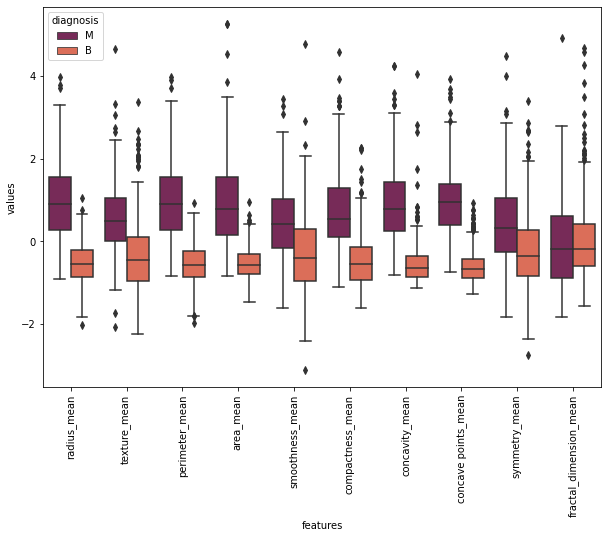

In [18]:
# box plot is used to find outliers in the data
# we consider first 10 features first
new_data = pd.concat([label, data_std.iloc[:,0:10]], axis=1)

# use melt() funciton to massage a dataframe in to a format where one or more columns are identifier_vars, and others are measure_vars
new_data = pd.melt(new_data, id_vars="diagnosis", var_name="features", value_name="values")

# use boxplot
plt.figure(figsize=(10,7))
data = sns.boxplot(x="features", y="values", hue="diagnosis", data=new_data, palette="rocket")
plt.xticks(rotation=90)
plt.show();

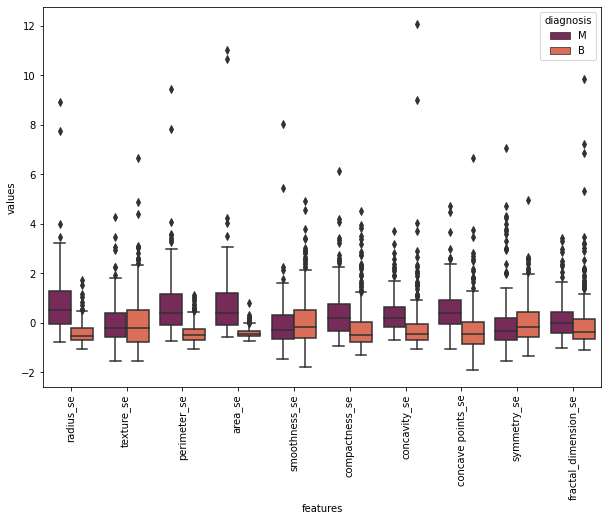

In [19]:
# we consider second 10 features now.
new_data = pd.concat([label, data_std.iloc[:,10:20]], axis=1)

# use melt() funciton to massage a dataframe in to a format where one or more columns are identifier_vars, and others are measure_vars
new_data = pd.melt(new_data, id_vars="diagnosis", var_name="features", value_name="values")

# use boxplot
plt.figure(figsize=(10,7))
data = sns.boxplot(x="features", y="values", hue="diagnosis", data=new_data, palette="rocket")
plt.xticks(rotation=90)
plt.show();

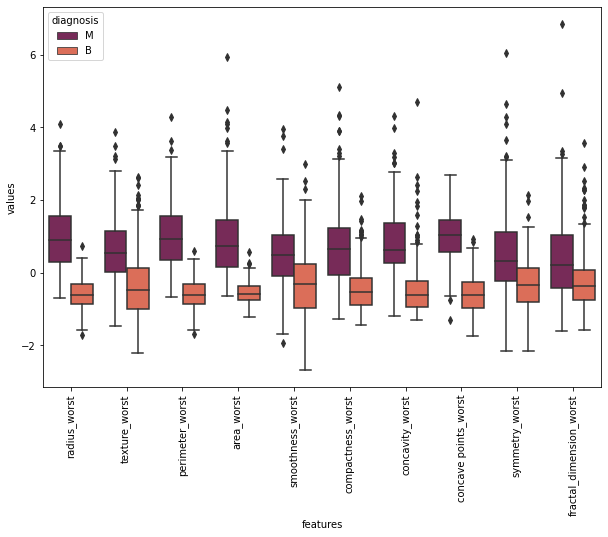

In [20]:
# now we consider third 10 features.
new_data = pd.concat([label, data_std.iloc[:,20:30]], axis=1)

# use melt() funciton to massage a dataframe in to a format where one or more columns are identifier_vars, and others are measure_vars
new_data = pd.melt(new_data, id_vars="diagnosis", var_name="features", value_name="values")

# use boxplot
plt.figure(figsize=(10,7))
data = sns.boxplot(x="features", y="values", hue="diagnosis", data=new_data, palette="rocket")
plt.xticks(rotation=90)
plt.show();

From the above box plots, it is observed that there are outliers in almost all the features. To get more clear picture from the data or to get clear variance, we use another plotting to find best results.

For that, we use strip plots. Strip plots are good complement to a boxplot or violinplot in cases where all observations are shown along with some representation of the underlying distribution. This plot helps to show the data distribution more clearly and easily. Let's visualize and see the results from it.

**2. Stripplot:**

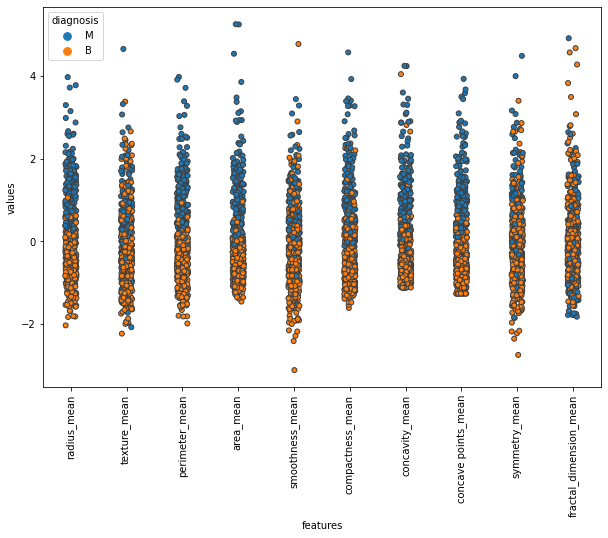

In [21]:
# strip plot is easy to clear variance among the data
# we consider first 10 features
new_data = pd.concat([label, data_std.iloc[:,0:10]], axis=1)

# use melt() funciton to massage a dataframe in to a format where one or more columns are identifier_vars, and others are measure_vars
new_data = pd.melt(new_data, id_vars="diagnosis", var_name="features", value_name="values")

# use stripplot
plt.figure(figsize=(10,7))
data = sns.stripplot(x="features", y="values", hue="diagnosis", data=new_data, jitter=1, linewidth=1)
plt.xticks(rotation=90)
plt.show();

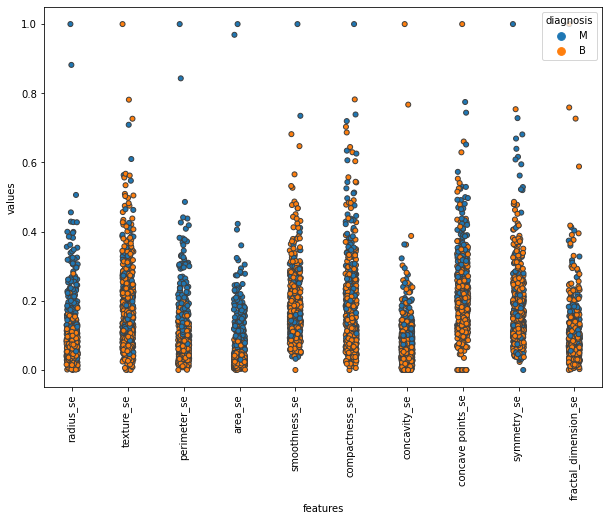

In [22]:
# Now, we consider second 10 features.
new_data = pd.concat([label, data_norm.iloc[:,10:20]], axis=1)

# use melt() funciton to massage a dataframe in to a format where one or more columns are identifier_vars, and others are measure_vars
new_data = pd.melt(new_data, id_vars="diagnosis", var_name="features", value_name="values")

# use stripplot
plt.figure(figsize=(10,7))
data = sns.stripplot(x="features", y="values", hue="diagnosis", data=new_data, jitter=1, linewidth=1)
plt.xticks(rotation=90)
plt.legend(loc='upper right', title="diagnosis")
plt.show();

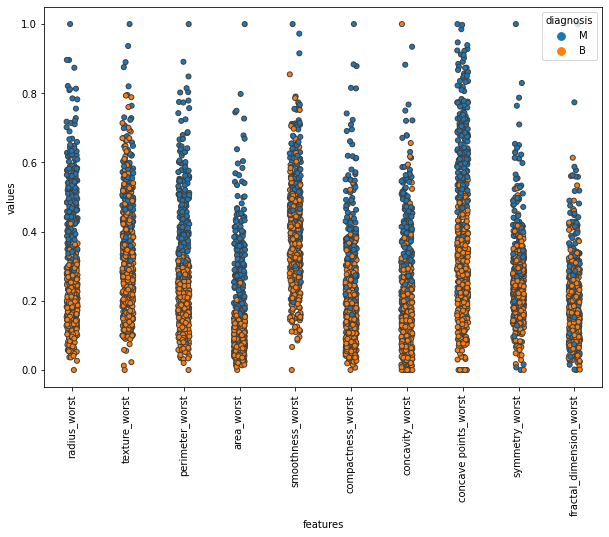

In [23]:
# Now, we consider third 10 features.
new_data = pd.concat([label, data_norm.iloc[:,20:30]], axis=1)

# use melt() funciton to massage a dataframe in to a format where one or more columns are identifier_vars, and others are measure_vars
new_data = pd.melt(new_data, id_vars="diagnosis", var_name="features", value_name="values")

# use stripplot
plt.figure(figsize=(10,7))
data = sns.stripplot(x="features", y="values", hue="diagnosis", data=new_data, jitter=1, linewidth=1)
plt.xticks(rotation=90)
plt.legend(loc='upper right', title="diagnosis")
plt.show();

From the above three plots, it is observed that the variance of the data points are visible clearly. For example, radius_mean, area_mean, concave_points_mean, area_se, area_worst, perimeter_worst are almost clear comapre to other features. 

To select particular features from the above data, we will explore more by applying feature selection techniques.

#### Feature Selection:

It is an important step in data preprocessing. It is used to find the best set of features that allows one to build useful models in machine learning.

Although there are many methods in features selection, but in this project we are using target variable. So, we will explore in to different techniques in one of the methods:

    1. Filter Methods like,
         
            a. Correlation
            b. Chi-Square Test
            
    2. Wrapper Methods like,
    
            a. Recursive Feature Elimination Using Random Forest 
            b. Gradient Boost Feature Selection
            

**1. Filter Methods**

**a. Correlation Co-efficient:**

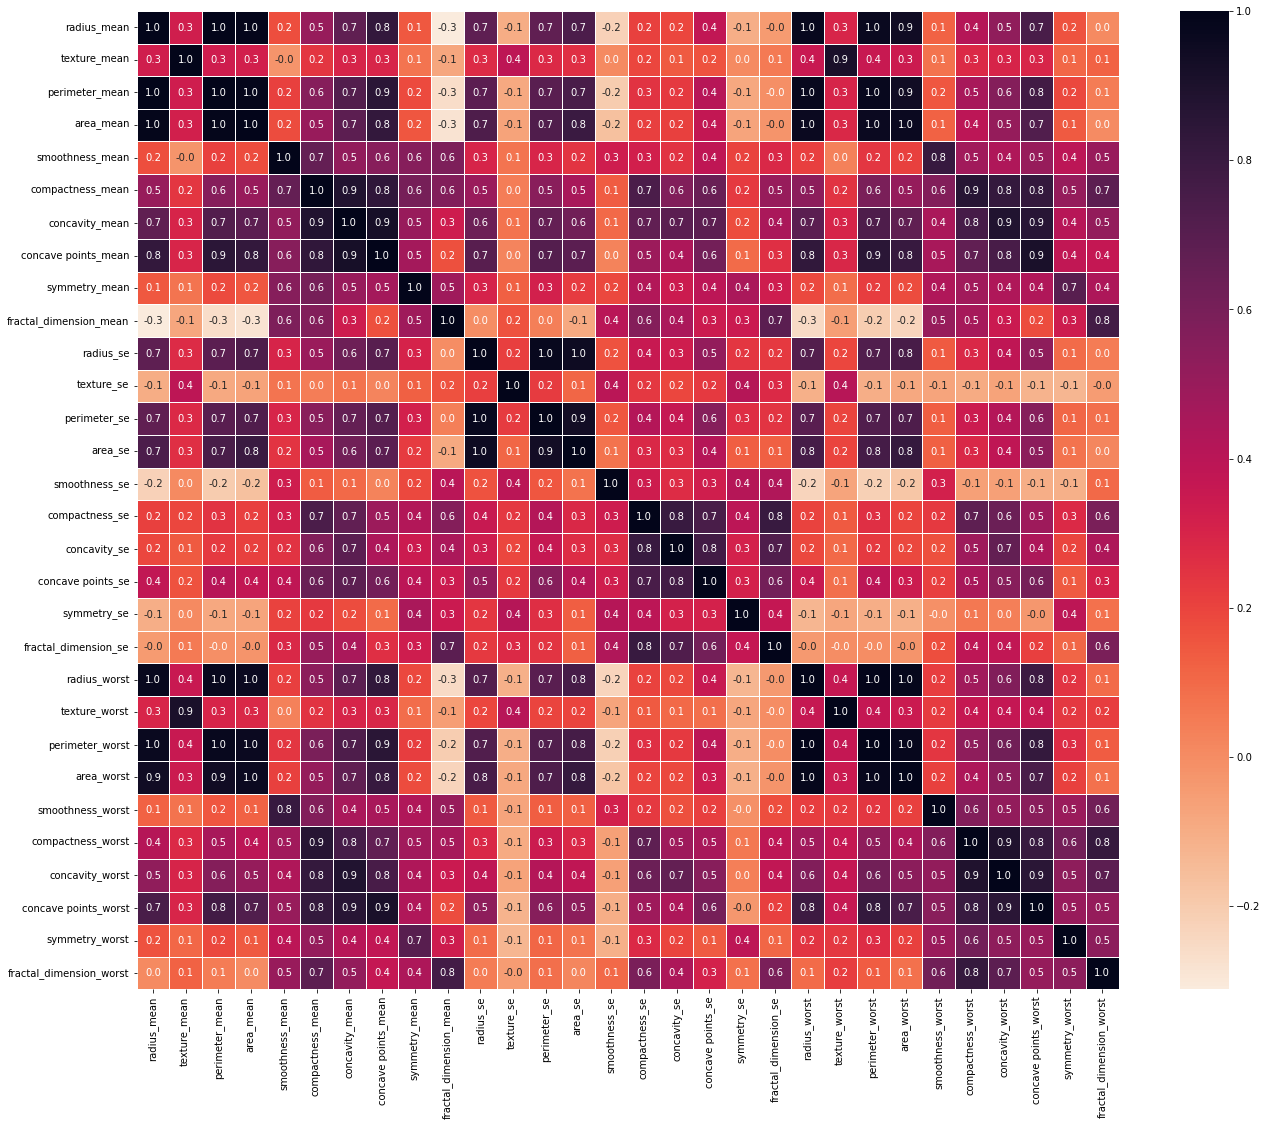

In [24]:
# correlation map or heat map
f,ax = plt.subplots(figsize=(22,18))

sns.heatmap(data = updated_data.corr(), annot=True, cmap="rocket_r", fmt = ".1f", linewidth=0.5, ax=ax)
plt.show();

From the above heatmap, it is observed that the radius_mean, perimeter_mean, area_mean considering only one among these, compactness_mean, concavity_mean, concave_points_mean are highly correlated whereas texture_mean and smoothness_mean, symmetry_mean and fractal_dimension_mean are less correlated compared to the features mentioned before.

Also, the other features like radius_se, perimeter_se, area_se are highly correlated considering only one among these whereas compactness_se, concavity_se and concave_points_se are little less correlated compared to the features mentioned before.

However, we remove the features that are highly correlated because high correlated features effect and do not improve the models like linear regression, random forests.

Removing such type of correlated features improves the learning algorithm faster. Considering less features mean high improvement in speed.

**Drop Highly Correlated Features from the dataset**

In [25]:
drop_corr_lst = ["radius_mean", "perimeter_mean", "compactness_mean", "concave points_mean", "radius_se", "perimeter_se", "compactness_se", "concave points_se", "radius_worst", "perimeter_worst","area_worst", "concavity_worst", "concave points_worst"]
selected_features = updated_data.drop(drop_corr_lst, axis=1)

Now, let's cheeck if there are any more correlated features after selecting new features. To do this, we use heatmap again.

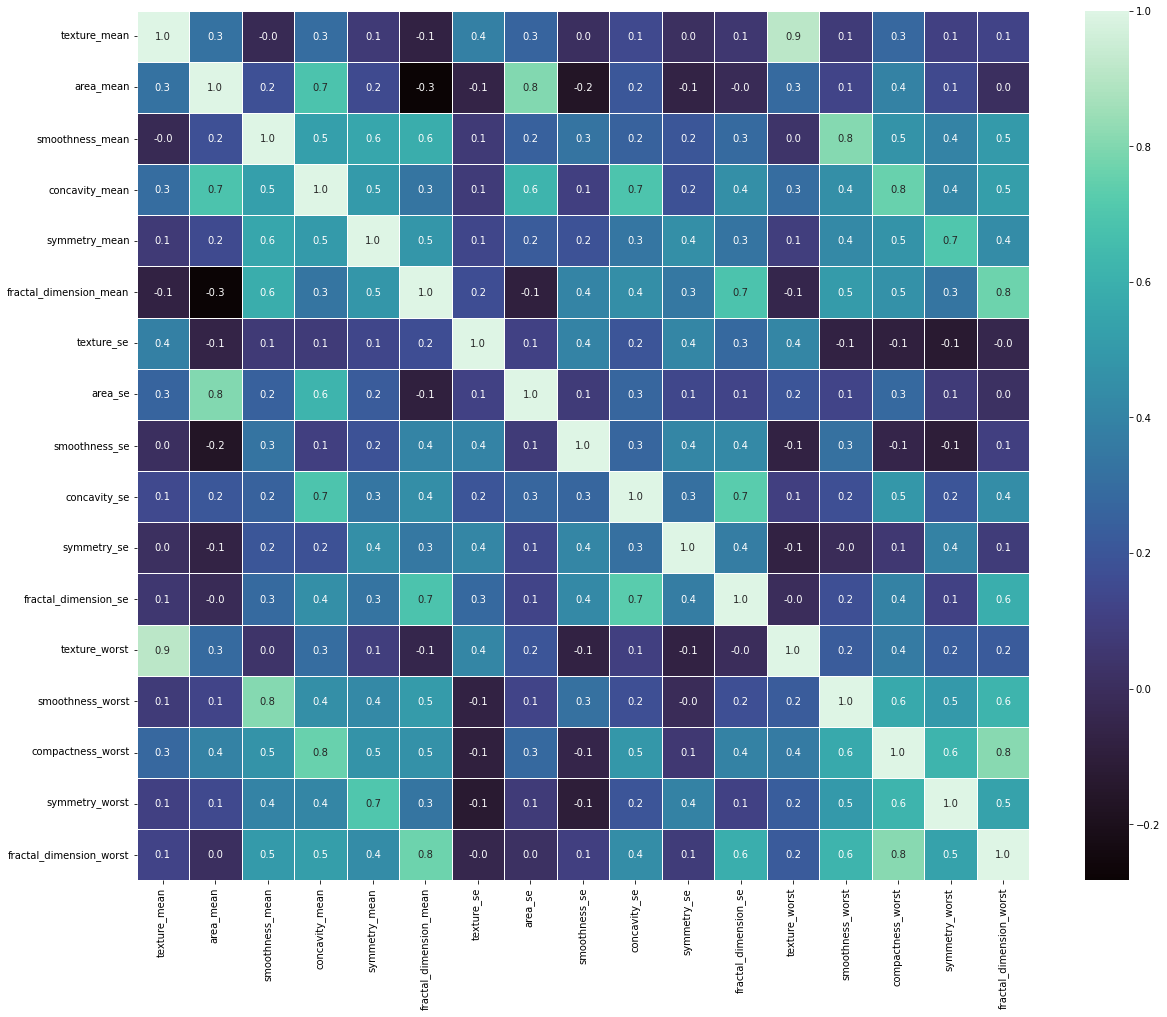

In [26]:
# correlation map or heat map after selecting new features
f,ax = plt.subplots(figsize=(20,16))

sns.heatmap(data = selected_features.corr(), annot=True, cmap="mako", fmt = ".1f", linewidth=0.5, ax=ax)
plt.show();

From the above heatmap, we can observe that there are still some features with correlations like 0.9, 1.0.

We will test it using another feature selection technique called "Chi-Square Test" to find the best results.

**b. Chi-Square Test:**

It is used for categorical features in the dataset. We calculate Chi-square between each feature and the target and select the desired number of features (like k = 5 or 10 or 15 highest features) with the best Chi-square scores. In order to correctly apply the chi-squared in order to test the relation between various features in the dataset and the target variable, the following conditions have to be met: the variables have to be categorical, sampled independently and values should have an expected frequency greater than 5.


 

In [28]:
# Split the data in to training and testing sets
from sklearn.model_selection import train_test_split

X = selected_features
y = label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [29]:
# chi-square test
from sklearn.feature_selection import SelectKBest, chi2

# select 5 features with the best Chi-square scores
select_5_features = SelectKBest(chi2, k=7).fit(X_train, y_train)
select_5_features

SelectKBest(k=7, score_func=<function chi2 at 0x000001C6B7C4BF70>)

In [30]:
# to get the dataframe
from pandas import DataFrame

# adjusts the float number to two digits after the point
pd.options.display.float_format = '{:.2f}'.format
chi2_features = DataFrame(select_5_features.scores_, columns = ["Chi_Square"], index=X_train.columns)
chi2_features.reset_index().sort_values("Chi_Square", ascending=False)

,index,Chi_Square
1,area_mean,42638.17
7,area_se,7126.59
12,texture_worst,149.72
0,texture_mean,84.76
3,concavity_mean,15.88
14,compactness_worst,15.06
15,symmetry_worst,1.09
9,concavity_se,0.89
13,smoothness_worst,0.30
4,symmetry_mean,0.22


From the above chi-square test scores, it is observed that the highest score is for the feature area_mean and the rest follows.

However, we cannot select the features just based on chi-square scores. Let's analyze a bit more using another technique.

**2. Wrapper Methods**

**a. Recursive Feature Elimination By Using Random Forest:**

The goal of Recursive Feature Elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 

In simple terms, this method fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model's coef_ or feature_importances_ attributes.

In [31]:
# import necessary dependencies
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# It calculates the imprtance of all the features and then find out mean of imp all the features
# and selects all features which have imp > mean.
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
selector.fit(X_train, y_train)
selector.get_support()

SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1, random_state=0))

array([False,  True, False,  True, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False])

In [32]:
# check the columns 
X_train.columns

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'texture_worst', 'smoothness_worst', 'compactness_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [33]:
# returns which features are selected from the above with the True
rfc = X_train.columns[selector.get_support()]
rfc
print(len(rfc))

Index(['area_mean', 'concavity_mean', 'area_se', 'compactness_worst'], dtype='object')

4


In [34]:
# mean of those features

from numpy import mean
np.mean(selector.estimator_.feature_importances_)

# prints the features that are > 0.05
# Here. greater the value means greater the importance
print(selector.estimator_.feature_importances_)

0.05882352941176469

[0.04745409 0.19253955 0.01734072 0.21577732 0.01354403 0.01662816
 0.01238011 0.20615119 0.01209866 0.03867969 0.01036852 0.01452466
 0.05629959 0.02343004 0.0847903  0.02459391 0.01339944]


In [35]:
# Now, select only the above features in new dataset.
X_train_rfc = selector.transform(X_train)
X_test_rfc = selector.transform(X_test)

In [36]:
from sklearn.metrics import accuracy_score

# write RandomForest Algorithm

def randomForest(X_train, X_test, y_train, y_test):
    
    # get the objects of the random forests with CLF
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    
    # Here, X_train is not taking global value frm the above,
    # it is just taking local value from this function
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test, y_pred))

In [37]:
# Now, call the method by passing dataset after the feature selection

%time
randomForest(X_train_rfc, X_test_rfc, y_train, y_test)

Wall time: 0 ns
Accuracy:  0.9210526315789473


In [38]:
# Now, we see accuracy of original dataset

%time
randomForest(X_train, X_test, y_train, y_test)

Wall time: 0 ns
Accuracy:  0.9385964912280702


From the above accuracy scores, the selected features score has decreased compare to the accuracy of original dataset 'X_train'. 

Although, there are other methods that the accuracy can be improved in the feature selection.

This can be done by using the Recursive Feature Elimination.

**RFE:**

In [39]:
# import necessary dependencies

from sklearn.feature_selection import RFE

In [40]:
# Now, we use RFE to remove least performing features from X_train dataset
# and keeps the best features.

selector = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select=10)
selector.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
    n_features_to_select=10)

In [41]:
# returns the selected features

print("Selected Features: %s" % (selector.get_support()))

Selected Features: [ True  True  True  True False  True False  True False  True False False
  True False  True  True False]


In [42]:
# returns the column names of selected features

rfe = X_train.columns[selector.get_support()]
rfe
print(len(rfe))

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'area_se', 'concavity_se', 'texture_worst',
       'compactness_worst', 'symmetry_worst'],
      dtype='object')

10


In [43]:
# Now, select only the above features in new dataset.

X_train_rfe = selector.transform(X_train)
X_test_rfe = selector.transform(X_test)

In [44]:
# Now, call the method by passing dataset after the feature selection

%time
randomForest(X_train_rfe, X_test_rfe, y_train, y_test)

Wall time: 0 ns
Accuracy:  0.9649122807017544


In [45]:
# Now, we see accuracy of original dataset

%time
randomForest(X_train, X_test, y_train, y_test)

Wall time: 0 ns
Accuracy:  0.9385964912280702


From the above results, it is observed that the accuracy of the selected 10 features using RFC is 92.1% whereas the accuracy of the original training dataset with 16 features is 93.8%. 

Also, the accuracy of the selected 10 features using RFE Random Forest is 96.49% whereas the accuracy of the original training dataset with 16 features is 93.8%. 

And, if we observe that the selected features from the RFC is same as the selected features from the RFE.

**b. Gradient Boosted Feature Selection:**

It is a ML techniuqe used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble (In ML, ensemble methods use multiple algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone) of weak prediction models, which are typically decision trees. When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees.

It is more efficient in feature selection.



In [46]:
# import dependencies

from sklearn.ensemble import GradientBoostingClassifier

In [47]:
# Now, we use RFE to remove least performing features from X_train dataset
# and keeps the best features.

sel = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select=10)
sel.fit(X_train, y_train)

RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=10)

In [48]:
# returns the selected features

print("Selected Features: %s" % (sel.get_support()))

Selected Features: [ True  True  True  True False False  True  True False False False False
  True  True  True  True False]


In [49]:
# returns the column names of selected features

gbfs = X_train.columns[sel.get_support()]
gbfs
print(len(gbfs))

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'texture_se', 'area_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'symmetry_worst'],
      dtype='object')

10


In [50]:
# Now, select only the above features in new dataset.

X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)

In [51]:
# Now, call the method by passing dataset after the feature selection

%time
randomForest(X_train_rfe, X_test_rfe, y_train, y_test)

Wall time: 0 ns
Accuracy:  0.9649122807017544


In [52]:
# Now, we see accuracy of original dataset

%time
randomForest(X_train, X_test, y_train, y_test)

Wall time: 0 ns
Accuracy:  0.9385964912280702


In [53]:
# use 'for' loop to select the accuracy of all features automatically

for index in range(1,17):
    selector = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select=index)
    selector.fit(X_train, y_train)
    X_train_rfe = selector.transform(X_train)
    X_test_rfe = selector.transform(X_test)
    print("Selected Feature: ", index)
    randomForest(X_train_rfe, X_test_rfe, y_train, y_test)
    print()

RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=1)

Selected Feature:  1
Accuracy:  0.7894736842105263



RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=2)

Selected Feature:  2
Accuracy:  0.8859649122807017



RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=3)

Selected Feature:  3
Accuracy:  0.9122807017543859



RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=4)

Selected Feature:  4
Accuracy:  0.9385964912280702



RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=5)

Selected Feature:  5
Accuracy:  0.9473684210526315



RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=6)

Selected Feature:  6
Accuracy:  0.956140350877193



RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=7)

Selected Feature:  7
Accuracy:  0.9385964912280702



RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=8)

Selected Feature:  8
Accuracy:  0.956140350877193



RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=9)

Selected Feature:  9
Accuracy:  0.956140350877193



RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=10)

Selected Feature:  10
Accuracy:  0.9649122807017544



RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=11)

Selected Feature:  11
Accuracy:  0.9385964912280702



RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=12)

Selected Feature:  12
Accuracy:  0.9649122807017544



RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=13)

Selected Feature:  13
Accuracy:  0.956140350877193



RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=14)

Selected Feature:  14
Accuracy:  0.9385964912280702



RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=15)

Selected Feature:  15
Accuracy:  0.956140350877193



RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=16)

Selected Feature:  16
Accuracy:  0.9649122807017544



In [54]:
# Highest accuracy feature

selector = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select=index)
selector.fit(X_train, y_train)
X_train_rfe = selector.transform(X_train)
X_test_rfe = selector.transform(X_test)
print("Selected Feature: ", 16)
randomForest(X_train_rfe, X_test_rfe, y_train, y_test)
print()

RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=16)

Selected Feature:  16
Accuracy:  0.9649122807017544



### 5. Data Modeling

#### Model Building - Logistic Regression

In [55]:
# LoadData routine is used to read dataset and create training and testing datasets
def LoadData():
    
    global feature_names, response_name, n_features, model_data 
    model_data = pd.read_csv('Breast_Cancer_Prediction.csv')
        
    # we change the class values from B to 0 and from M to 1
    model_data.iloc[:,1].replace('B', 0,inplace=True)
    model_data.iloc[:,1].replace('M', 1,inplace=True)
    response_name = ['diagnosis']
    drop_list = ['Unnamed: 32','id','diagnosis']
    model_data_new = model_data.drop(drop_list,axis = 1)
    X = model_data_new
    y = model_data.diagnosis
    
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size = 0.3,
                                                        random_state = 12345)
    return X_train, y_train, X_test, y_test

In [56]:
# take the 10 features that has applied feature selection medthods
fs = ['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'texture_se', 'area_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'symmetry_worst']

In [57]:
# take new variable and store it in the function
x_train, y_train, x_test, y_test = LoadData()

In [58]:
# store these selected features in the X_train and X_test
X_train = x_train[fs]
X_test = x_test[fs]

In [59]:
# import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# loading the logistic regression model to the variable clf
clf = LogisticRegression() 

# training the model on training data
clf.fit(X_train, y_train)

C:\Users\akell\anaconda3\envs\flask_project\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 6. Model Evaluation

In [60]:
# Evaluate the model
# import accuracy score

from sklearn.metrics import accuracy_score

# predict the training data without giving label
prediction_on_training_data = clf.predict(X_train)

# checks the accuracy score with the target value and prediction_on_training_data.
# accuracy score compares both of them and gives % of how much data it can predict correctly.

accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)
print("Accuracy on training data: ", accuracy_on_training_data)

Accuracy on training data:  0.9522613065326633


In [61]:
# prediction on test_data
prediction_on_test_data = clf.predict(X_test)

# accuracy on test data
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)
print("Accuracy on test data: ", accuracy_on_test_data)

Accuracy on test data:  0.9473684210526315


In [62]:
# check the confusion_matrix and classification_report
# import necessary dependencies
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Confusion Matrix : \n\n" , confusion_matrix(prediction_on_test_data,y_test))

print("Classification Report : \n\n" , classification_report(prediction_on_test_data,y_test),"\n")


Confusion Matrix : 

 [[109   7]
 [  2  53]]
Classification Report : 

               precision    recall  f1-score   support

           0       0.98      0.94      0.96       116
           1       0.88      0.96      0.92        55

    accuracy                           0.95       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171
 



### 7. Model Deployment

In [63]:
# store this model in pickle file uisng clf 
import pickle

pickle.dump(clf, open('model.pkl', 'wb'))

model = pickle.load(open('model.pkl', 'rb'))
print(model)

LogisticRegression()
